In [1]:
import pandas as pd

In [2]:
path = r"C:\Users\Rodrigo\Desktop\Roxana Files\base_maestra\base_maestra.xlsx"
df = pd.read_excel(path)

df

,ID,FOLIO,NOMBRE,SEXO,AREA_OCDE,Fecha inicio_beca,Fecha inicio_datetime,TIPO_BECA,UNIVERSIDAD_PROGRAMA,PROGRAMA,...,DISCIPLINA_DETALLE,GRUPO_DE_EVALUACION,DURACION_MESES,TIPO_BENEFICIARIO,INSTITUCION_PRINCIPAL,MACROZONA_MINCIENCIA,REGION_EJECUCION,MONTO_ADJUDICADO,PALABRAS_CLAVES,Tiene_fondecyt
0,1,72160230,ABELINO ENRIQUE JIMENEZ GAJARDO,MASCULINO,STEM,2015,01-01-2015,BECAS CHILE,CARNEGIE MELLON UNIVERSITY,PHD IN ELECTRICAL AND COMPUTER ENGINEERING,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,2,21150571,ABRAHAM BENJAMIN NOVOA LAGOS,MASCULINO,Ciencias Sociales,2015,01-01-2015,CONICYT,UNIVERSIDAD DE CONCEPCION,DOCTORADO EN LINGUISTICA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,3,72170568,ACCEL NICOLAS ABARCA PROUZA,MASCULINO,STEM,2016,01-01-2016,BECAS CHILE,TECHNISCHE UNIVERSITEIT DELFT,PH.D. IN ELECTRICAL ENGINEERING,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,4,72170089,ADELAIDA BARROS CAJDLER,FEMENINO,Ciencias Sociales,2016,01-01-2016,BECAS CHILE,UNIVERSITY OF OXFORD,D. PHIL. IN SOCIAL AND CULTURAL ANTHROPOLOGY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,5,72170561,ADOLFO ANTONIO ROCCO ROCCO,MASCULINO,STEM,2016,01-01-2016,BECAS CHILE,GEORGIA INSTITUTE OF TECHNOLOGY,PHD IN OPERATIONS RESEARCH,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3138,3139,21161551,ZACHARY JOHN HUGO,MASCULINO,Ciencias Sociales,2016,01-01-2016,CONICYT,UNIVERSIDAD ALBERTO HURTADO,DOCTORADO EN FILOSOFIA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3139,3140,21151192,ZAMBRA DEL CARMEN LOPEZ FARRAN,FEMENINO,STEM,2015,01-01-2015,CONICYT,UNIVERSIDAD DE CHILE,DOCTORADO EN CIENCIAS MENCION ECOLOGIA Y BIOLO...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3140,3141,72150054,ZAYRA ELIZABETH ANTUNEZ SANHUEZA,FEMENINO,Ciencias Sociales,2014,01-01-2014,BECAS CHILE,UNIVERSIDAD AUTONOMA DE BARCELONA,DOCTORADO EN PSICOLOGIA CLINICA Y DE LA SALUD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3141,3142,63140267,ZENEIDA ELIZABETH WONG CHANG,FEMENINO,STEM,2014,01-01-2014,CONICYT,UNIVERSIDAD DE CONCEPCION,DOCTORADO EN OCEANOGRAFIA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [3]:
df.dtypes

ID                               int64
FOLIO                            int64
NOMBRE                          object
SEXO                            object
AREA_OCDE                       object
Fecha inicio_beca                int64
Fecha inicio_datetime           object
TIPO_BECA                       object
UNIVERSIDAD_PROGRAMA            object
PROGRAMA                        object
PAIS                            object
Pregrado                        object
Extranjero                     float64
Secundaria en region Chile     float64
Nombre Secundaria               object
Comuna Establecimiento          object
Región Establecimiento          object
GSE Establecimiento             object
Dependencia_establecimiento     object
GSE_categoria                   object
RBD Colegio Secundario          object
Etnia                           object
N                              float64
CODIGO_PROYECTO                float64
SUBDIRECCION                    object
PROGRAMA_comb_1          

# Análisis Colegio Secundario

In [4]:
df["Etnia"].value_counts()

Etnia
NO    2828
SI     104
Name: count, dtype: int64

In [75]:
df["RBD Colegio Secundario"].value_counts()

RBD Colegio Secundario
estudio extranjero    122
8485                   94
5666                   35
8927                   34
8928                   27
                     ... 
10450                   1
24801                   1
25804                   1
10246                   1
6270                    1
Name: count, Length: 863, dtype: int64

In [6]:
import plotly.express as px

filtered_df = df[df["RBD Colegio Secundario"] != "estudio extranjero"]

top_15_rbd = filtered_df["RBD Colegio Secundario"].value_counts().head(15).sort_values(ascending=True)

top_15_names = filtered_df[filtered_df["RBD Colegio Secundario"].isin(top_15_rbd.index)][["RBD Colegio Secundario", "Nombre Secundaria"]].drop_duplicates().set_index("RBD Colegio Secundario")

top_15_rbd.index = top_15_rbd.index.map(top_15_names["Nombre Secundaria"])

fig = px.bar(top_15_rbd, x=top_15_rbd.values, y=top_15_rbd.index, orientation='h', color_discrete_sequence=['purple'], labels={'x': 'Frecuencia', 'y': 'Nombre Secundaria'}, title='Top 15 Colegios en RBD Colegio Secundario', text=top_15_rbd.values)
fig.update_traces(textposition='outside', textfont_color='purple')
fig.update_layout(yaxis_tickangle=0)
fig.show()


In [7]:
import plotly.express as px

# Filtrar los datos para excluir valores nulos en la columna Dependencia_establecimiento
filtered_df_dep = df[df["Dependencia_establecimiento"].notna()]

# Contar las frecuencias de los valores en la columna Dependencia_establecimiento
dep_counts = filtered_df_dep["Dependencia_establecimiento"].value_counts().sort_values(ascending=True)

# Crear el gráfico de barras en orientación vertical
fig_dep = px.bar(dep_counts, x=dep_counts.index, y=dep_counts.values, orientation='v', color_discrete_sequence=['purple'], labels={'x': 'Dependencia Establecimiento', 'y': 'Frecuencia'}, title='Frecuencia de Dependencia Establecimiento', text=dep_counts.values)
fig_dep.update_traces(textposition='outside', textfont_color='purple')
fig_dep.update_layout(xaxis_tickangle=0)
fig_dep.show()

# Análisis Grupo Socioeconómico

In [8]:
df.loc[df["RBD Colegio Secundario"] == "estudio extranjero", "GSE Establecimiento"] = "estudio extranjero"

df["GSE Establecimiento"].value_counts()

GSE Establecimiento
Alto                  870
Medio                 678
Medio alto            461
Medio bajo            395
estudio extranjero    122
Bajo                   84
0                      54
Name: count, dtype: int64

In [9]:
# Crear una nueva columna 'GSE_Procesado' con los grupos especificados
df['GSE_Procesado'] = df['GSE Establecimiento'].replace({
    'Bajo': 'Bajo',
    'Medio bajo': 'Bajo',
    'Medio': 'Medio',
    'Medio alto': 'Medio Alto',
    'Alto': 'Alto',
    'estudio extranjero': 'Extranjero'
})

# Mostrar los primeros registros para verificar
df[['GSE Establecimiento', 'GSE_Procesado']].head()

,GSE Establecimiento,GSE_Procesado
0,Alto,Alto
1,Bajo,Bajo
2,Alto,Alto
3,Alto,Alto
4,Medio,Medio


In [10]:
df["GSE_Procesado"].value_counts()

GSE_Procesado
Alto          870
Medio         678
Bajo          479
Medio Alto    461
Extranjero    122
0              54
Name: count, dtype: int64

In [ ]:
import plotly.express as px

# Filtrar los datos para excluir valores nulos en la columna GSE_Procesado y SEXO
filtered_df_gse = df[df["GSE_Procesado"].notna() & df["SEXO"].notna()]

# Contar las frecuencias de los valores en la columna GSE_Procesado segmentado por SEXO
gse_sexo_counts = filtered_df_gse.groupby(["GSE_Procesado", "SEXO"]).size().unstack().fillna(0)

# Crear el gráfico de barras en orientación vertical
fig_gse_sexo = px.bar(gse_sexo_counts, 
                      x=gse_sexo_counts.index, 
                      y=[col for col in gse_sexo_counts.columns], 
                      orientation='v', 
                      color_discrete_sequence=['purple', 'violet'], 
                      labels={'value': 'Frecuencia', 'GSE_Procesado': 'GSE Procesado'}, 
                      title

fig_gse_sexo.update_traces(textposition='outside', textfont_color='violet')
fig_gse_sexo.update_layout(xaxis_tickangle=0)
fig_gse_sexo.show()

In [54]:
import plotly.express as px

# Filtrar los datos para incluir solo los que tienen Fondecyt
filtered_df_fondecyt = df[df["Tiene_fondecyt"] == 1]

# Filtrar los datos para excluir valores nulos en la columna Dependencia_establecimiento
filtered_df_fondecyt_dep = filtered_df_fondecyt[filtered_df_fondecyt["Dependencia_establecimiento"].notna()]


# Crear el histograma para Dependencia_establecimiento segmentado por SEXO (Solo con Fondecyt)
fig_hist_dep_sexo_fondecyt = px.histogram(filtered_df_fondecyt_dep, 
                                          x="Dependencia_establecimiento", 
                                          color="SEXO", 
                                          barmode="group", 
                                          color_discrete_sequence=['purple', 'violet'], 
                                          labels={'Dependencia_establecimiento': 'Dependencia Establecimiento', 'count': 'Frecuencia'}, 
                                          title='Frecuencia de Dependencia Establecimiento (Solo con Fondecyt) segmentado por Sexo')

fig_hist_dep_sexo_fondecyt.show()

# Filtrar los datos para incluir solo los que no tienen Fondecyt
filtered_df_no_fondecyt = df[df["Tiene_fondecyt"] == 0]

# Filtrar los datos para excluir valores nulos en la columna Dependencia_establecimiento
filtered_df_no_fondecyt_dep = filtered_df_no_fondecyt[filtered_df_no_fondecyt["Dependencia_establecimiento"].notna()]


# Crear el histograma para Dependencia_establecimiento segmentado por SEXO (Sin Fondecyt)
fig_hist_dep_sexo_no_fondecyt = px.histogram(filtered_df_no_fondecyt_dep, 
                                             x="Dependencia_establecimiento", 
                                             color="SEXO", 
                                             barmode="group", 
                                             color_discrete_sequence=['blue', 'lightblue'], 
                                             labels={'Dependencia_establecimiento': 'Dependencia Establecimiento', 'count': 'Frecuencia'}, 
                                             title='Frecuencia de Dependencia Establecimiento (Sin Fondecyt) segmentado por Sexo')

fig_hist_dep_sexo_no_fondecyt.show()


In [73]:
import plotly.express as px

# Filtrar los datos para excluir valores nulos en la columna GSE_Procesado y SEXO
filtered_df_gse_sexo = df[(df["GSE_Procesado"].notna()) & (df["SEXO"].notna()) & (df["GSE_Procesado"] != "0")]

# Crear el histograma
fig_hist = px.histogram(filtered_df_gse_sexo, 
                        x="GSE_Procesado", 
                        color="SEXO", 
                        barmode="group", 
                        color_discrete_sequence=['purple', 'violet'], 
                        labels={'GSE_Procesado': 'GSE Procesado', 'count': 'Frecuencia'}, 
                        title='Histograma de Sexo por GSE Procesado')

fig_hist.show()

# Filtrar los datos para incluir solo los que tienen Fondecyt
filtered_df_fondecyt = df[(df["Tiene_fondecyt"] == 1) & (df["GSE_Procesado"] != "0")]

# Crear el histograma para los que tienen Fondecyt
fig_hist_fondecyt = px.histogram(filtered_df_fondecyt, 
                                 x="GSE_Procesado", 
                                 color="SEXO", 
                                 barmode="group", 
                                 color_discrete_sequence=['purple', 'violet'], 
                                 labels={'GSE_Procesado': 'GSE Procesado', 'count': 'Frecuencia'}, 
                                 title='Histograma de Sexo por GSE Procesado (Con Fondecyt)')

fig_hist_fondecyt.show()

# Filtrar los datos para incluir solo los que no tienen Fondecyt
filtered_df_no_fondecyt = df[(df["Tiene_fondecyt"] == 0) & (df["GSE_Procesado"] != "0")]

# Crear el histograma para los que no tienen Fondecyt
fig_hist_no_fondecyt = px.histogram(filtered_df_no_fondecyt, 
                                    x="GSE_Procesado", 
                                    color="SEXO", 
                                    barmode="group", 
                                    color_discrete_sequence=['blue', 'lightblue'], 
                                    labels={'GSE_Procesado': 'GSE Procesado', 'count': 'Frecuencia'}, 
                                    title='Histograma de Sexo por GSE Procesado (Sin Fondecyt)')

fig_hist_no_fondecyt.show()

In [66]:
import plotly.express as px

# Filtrar los datos para incluir solo los que tienen Fondecyt
filtered_df_fondecyt = df[df["Tiene_fondecyt"] == 1]

# Filtrar los datos para incluir solo los que no tienen Fondecyt
filtered_df_no_fondecyt = df[df["Tiene_fondecyt"] == 0]

# Crear el gráfico de barras para los que tienen Fondecyt segmentado por sexo
fig_fondecyt_sexo = px.histogram(filtered_df_fondecyt, 
                                 x="Dependencia_establecimiento", 
                                 color="SEXO", 
                                 barmode="group", 
                                 color_discrete_sequence=['purple', 'violet'], 
                                 labels={'Dependencia_establecimiento': 'Dependencia Establecimiento', 'count': 'Frecuencia'}, 
                                 title='Frecuencia de Dependencia Establecimiento (Con Fondecyt) segmentado por Sexo')

fig_fondecyt_sexo.show()

# Crear el gráfico de barras para los que no tienen Fondecyt segmentado por sexo
fig_no_fondecyt_sexo = px.histogram(filtered_df_no_fondecyt, 
                                    x="Dependencia_establecimiento", 
                                    color="SEXO", 
                                    barmode="group", 
                                    color_discrete_sequence=['blue', 'lightblue'], 
                                    labels={'Dependencia_establecimiento': 'Dependencia Establecimiento', 'count': 'Frecuencia'}, 
                                    title='Frecuencia de Dependencia Establecimiento (Sin Fondecyt) segmentado por Sexo')

fig_no_fondecyt_sexo.show()


In [72]:
import plotly.express as px

# Filtrar los datos para excluir valores nulos en la columna Pregrado y SEXO
filtered_df_pregrado = df[df["Pregrado"].notna() & df["SEXO"].notna()]

# Contar las frecuencias de los valores en la columna Pregrado
pregrado_counts = filtered_df_pregrado["Pregrado"].value_counts().head(7).sort_values(ascending=False)

# Filtrar los datos para incluir solo los que tienen Fondecyt
filtered_df_fondecyt = filtered_df_pregrado[filtered_df_pregrado["Tiene_fondecyt"] == 1]

# Filtrar los datos para incluir solo los que no tienen Fondecyt
filtered_df_no_fondecyt = filtered_df_pregrado[filtered_df_pregrado["Tiene_fondecyt"] == 0]

# Crear el gráfico de barras para los que tienen Fondecyt segmentado por sexo
fig_fondecyt_pregrado = px.histogram(filtered_df_fondecyt[filtered_df_fondecyt["Pregrado"].isin(pregrado_counts.index)], 
                                     y="Pregrado", 
                                     color="SEXO", 
                                     barmode="group", 
                                     orientation='h',
                                     color_discrete_sequence=['purple', 'violet'], 
                                     labels={'Pregrado': 'Pregrado', 'count': 'Frecuencia'}, 
                                     title='Frecuencia de Pregrado (Con Fondecyt) segmentado por Sexo')

fig_fondecyt_pregrado.update_yaxes(categoryorder='total ascending')
fig_fondecyt_pregrado.show()

# Crear el gráfico de barras para los que no tienen Fondecyt segmentado por sexo
fig_no_fondecyt_pregrado = px.histogram(filtered_df_no_fondecyt[filtered_df_no_fondecyt["Pregrado"].isin(pregrado_counts.index)], 
                                        y="Pregrado", 
                                        color="SEXO", 
                                        barmode="group", 
                                        orientation='h',
                                        color_discrete_sequence=['blue', 'lightblue'], 
                                        labels={'Pregrado': 'Pregrado', 'count': 'Frecuencia'}, 
                                        title='Frecuencia de Pregrado (Sin Fondecyt) segmentado por Sexo')

fig_no_fondecyt_pregrado.update_yaxes(categoryorder='total ascending')
fig_no_fondecyt_pregrado.show()

# Modelo para "Tiene Fondecyt"

In [11]:
import shap

C:\Users\Rodrigo\AppData\Roaming\Python\Python312\site-packages\tqdm\auto.py:21: TqdmWarning:

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html



In [78]:
from sklearn.model_selection import train_test_split

# Seleccionar las columnas relevantes
X = df[['Dependencia_establecimiento', 'GSE_Procesado', 'SEXO']]
y = df['Tiene_fondecyt']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=48, stratify=y)

In [79]:
X_train.head(5)

,Dependencia_establecimiento,GSE_Procesado,SEXO
1971,Particular Pagado,Alto,FEMENINO
3066,Municipalizado,Bajo,MASCULINO
2302,Municipalizado,Bajo,FEMENINO
603,Particular Subvencionado,Medio Alto,MASCULINO
1076,Particular Pagado,Alto,MASCULINO


In [80]:
X_train.shape

(2514, 3)

In [81]:
import xgboost as xgb

X_train['Dependencia_establecimiento'] = X_train['Dependencia_establecimiento'].astype('category')
X_train['GSE_Procesado'] = X_train['GSE_Procesado'].astype('category')
X_train['SEXO'] = X_train['SEXO'].astype('category')

clf = xgb.XGBClassifier(enable_categorical=True)
clf.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=True, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [82]:
from sklearn.metrics import classification_report

X_test['Dependencia_establecimiento'] = X_test['Dependencia_establecimiento'].astype('category')
X_test['GSE_Procesado'] = X_test['GSE_Procesado'].astype('category')
X_test['SEXO'] = X_train['SEXO'].astype('category')

preds = clf.predict(X_test)
print(classification_report(preds, y_test))

              precision    recall  f1-score   support

           0       1.00      0.77      0.87       629
           1       0.00      0.00      0.00         0

    accuracy                           0.77       629
   macro avg       0.50      0.39      0.44       629
weighted avg       1.00      0.77      0.87       629



C:\Users\Rodrigo\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

C:\Users\Rodrigo\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

C:\Users\Rodrigo\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.



### Recomendaciones para Mejorar la Identificación de la Clase Positiva

1. **Balanceo de Clases**:
    - Utilizar técnicas de balanceo de clases como sobremuestreo (SMOTE) o submuestreo para equilibrar la cantidad de ejemplos de cada clase en el conjunto de entrenamiento.

2. **Ajuste de Hiperparámetros**:
    - Realizar una búsqueda de hiperparámetros (Grid Search o Random Search) para encontrar la configuración óptima del modelo que mejore la identificación de la clase positiva.

3. **Uso de Métricas Adecuadas**:
    - Optimizar el modelo utilizando métricas que consideren el desequilibrio de clases, como el F1-Score, en lugar de la exactitud general.

4. **Ensemble Learning**:
    - Implementar métodos de ensemble como Random Forest, Gradient Boosting o Voting Classifier para combinar múltiples modelos y mejorar la capacidad de predicción de la clase positiva.

5. **Ingeniería de Características**:
    - Crear nuevas características relevantes o transformar las existentes para proporcionar más información al modelo y mejorar su capacidad de distinguir entre las clases.



In [84]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Convertir las columnas a string para evitar errores en OneHotEncoder
X_train['Dependencia_establecimiento'] = X_train['Dependencia_establecimiento'].astype(str)
X_train['GSE_Procesado'] = X_train['GSE_Procesado'].astype(str)
X_train['SEXO'] = X_train['SEXO'].astype(str)

# Eliminar filas con valores NaN en X_train y y_train
X_train = X_train.dropna()
y_train = y_train[X_train.index]

# Preprocesamiento de variables categóricas
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['Dependencia_establecimiento', 'GSE_Procesado', 'SEXO'])
    ],
    remainder='passthrough'
)

# Crear un pipeline con preprocesamiento y clasificador
pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', xgb.XGBClassifier(enable_categorical=True))
])

# Definir los parámetros para la búsqueda de hiperparámetros
param_grid = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [3, 5, 7],
    'classifier__learning_rate': [0.01, 0.1, 0.2]
}

# Realizar la búsqueda de hiperparámetros con GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='f1', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Mostrar los mejores hiperparámetros encontrados
print("Mejores hiperparámetros:", grid_search.best_params_)


Mejores hiperparámetros: {'classifier__learning_rate': 0.01, 'classifier__max_depth': 3, 'classifier__n_estimators': 100}


In [85]:
# Generar predicciones
preds = grid_search.predict(X_test)

# Mostrar el informe de clasificación
print(classification_report(preds, y_test))

              precision    recall  f1-score   support

           0       0.13      0.69      0.21        88
           1       0.81      0.21      0.34       541

    accuracy                           0.28       629
   macro avg       0.47      0.45      0.27       629
weighted avg       0.71      0.28      0.32       629



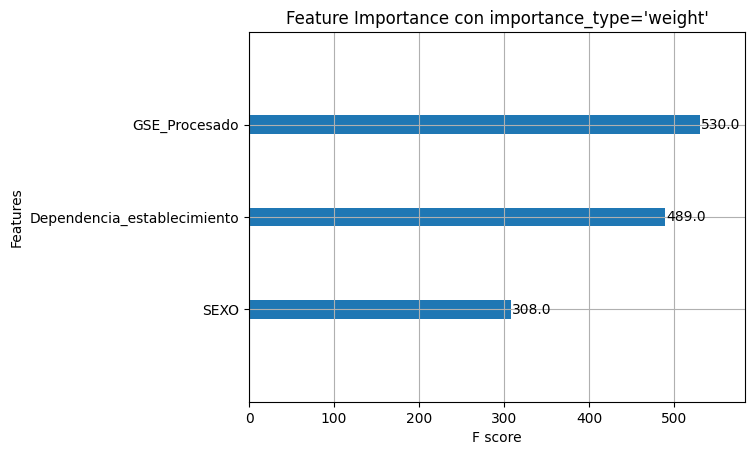

In [86]:
import xgboost as xgb

import matplotlib.pyplot as plt

# weight: número de veces que una característica es usada para dividir los datos
xgb.plot_importance(clf, max_num_features=20)
plt.title("Feature Importance con importance_type='weight'")
plt.show()

In [96]:
# Convert object columns to categorical
X['Dependencia_establecimiento'] = X['Dependencia_establecimiento'].astype('category')
X['GSE_Procesado'] = X['GSE_Procesado'].astype('category')
X['SEXO'] = X['SEXO'].astype('category')

explainer = shap.TreeExplainer(clf)
shap_values = explainer.shap_values(X)

C:\Users\Rodrigo\AppData\Local\Temp\ipykernel_9332\3178342917.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Rodrigo\AppData\Local\Temp\ipykernel_9332\3178342917.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Rodrigo\AppData\Local\Temp\ipykernel_9332\3178342917.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pa

In [88]:
shap_values

array([[-0.12001211,  0.1927493 ,  0.01957519],
       [ 0.15707973,  0.24731317,  0.06762698],
       [-0.12001211,  0.1927493 ,  0.01957519],
       ...,
       [ 0.04193291,  0.19197716, -0.0441173 ],
       [-0.12025031, -0.26394075, -0.00071354],
       [-0.12025031, -0.26394075, -0.00071354]], dtype=float32)

In [89]:
import numpy as np

explainer.expected_value

-1.2312405

In [90]:
# Transformar logits a probabilidad
probabilidades = np.exp(shap_values[0]) / (1 + np.exp(shap_values[0]))
probabilidades

array([0.47003293, 0.54803866, 0.50489366], dtype=float32)

In [91]:
idx = 154

shap.initjs()
shap.force_plot(explainer.expected_value, 
                shap_values[idx,:], 
                X.iloc[idx,:],
                link="logit")

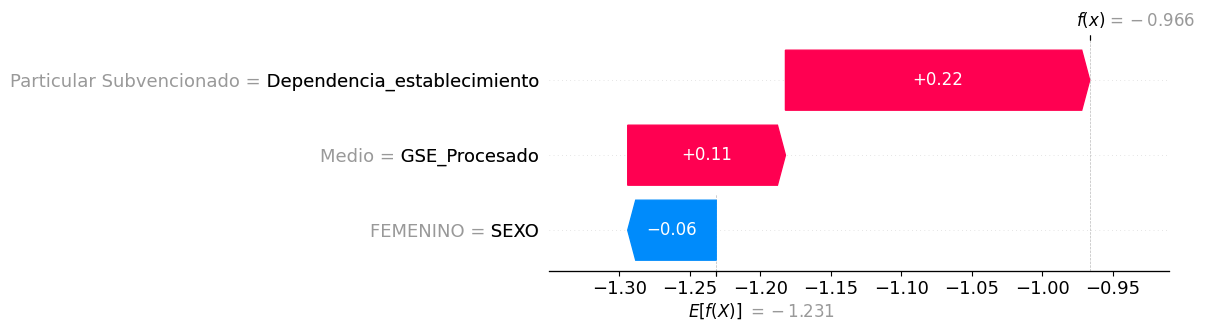

In [92]:
idx=154

shap_values_exp = shap.Explanation(values=shap_values, base_values=explainer.expected_value, data=X)

shap.plots.waterfall(shap_values_exp[idx, :], max_display=14)

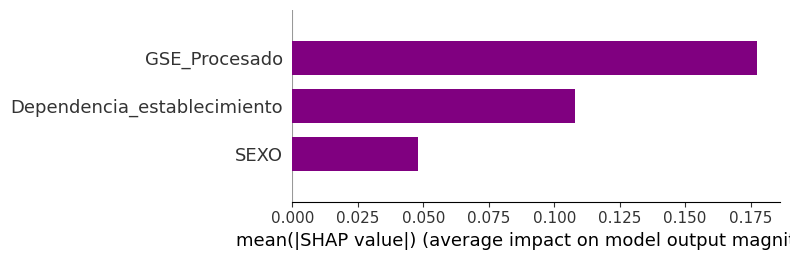

In [93]:
shap.summary_plot(shap_values, X, plot_type="bar", color='purple')

In [94]:
batch_size = 9
shap.force_plot(explainer.expected_value, shap_values[:batch_size, :], X.iloc[:batch_size, :], link='logit')